In [159]:
# !python
# -*- coding: utf-8 -*

__author__ = 'Erling Ween Eriksen'
__email__ = 'erlinge@nmbu.no'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize
import scipy.stats as stats

ME51 = pd.read_csv(r'ME_5_10_rand20.csv', names=['M', 'E'])
ME52 = pd.read_csv(r'ME_5_24_rand20.csv', names=['M', 'E'])

n_iter = len(ME51.index)
burnin = 0
plot_n = n_iter-1
plot_range = np.arange(burnin, plot_n)

ME51 = ME51.iloc[plot_range]
ME52 = ME52.iloc[plot_range]

kb = 1.38 * 10 ** (-23)
N_spins = 20*20

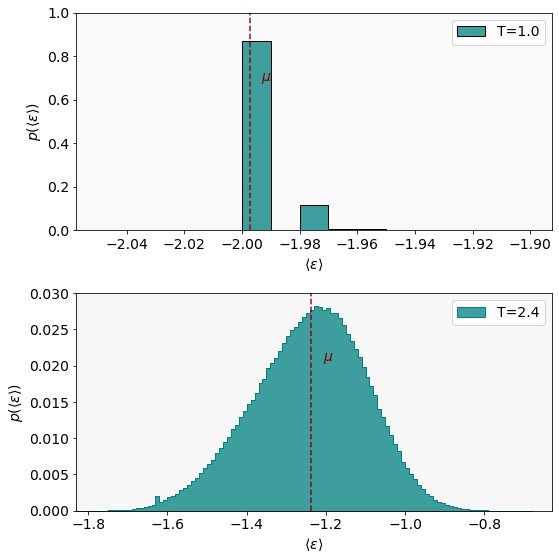

In [158]:
fig, axs = plt.subplots(2, sharex=False)
fig.set_figheight(8)
fig.set_figwidth(8)
ax=axs[0]

sns.histplot(ME51.E/N_spins,
              label = 'T=1.0',
              binwidth=4/N_spins,  
              log_scale=(False,False),
              color='teal',
              binrange=(-2.05,-1.9),
              stat='probability',
              ax=axs[0]
             )
mean1 = ME51.E.mean()/N_spins
ax.plot([mean1,mean1], [0, 1], color='maroon', alpha=0.9, linestyle='dashed')

ax.text(0.4, 0.7, r'$\mu$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='maroon')

ax.set_ylim((0,1))
ax.set_xlabel(r'$\langle \epsilon \rangle$')
ax.set_ylabel(r'$p(\langle \epsilon \rangle)$')

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

ax.set_facecolor((0.98, 0.98, 0.98))

ax.legend()


ax = axs[1]


sns.histplot(ME52.E/N_spins, 
                  binwidth=4/(N_spins), 
                  kde=False, 
                  common_norm=False, 
                  log_scale=(False,False), 
                  element="step",
                  label='T=2.4',
                  color='teal',
                  stat='probability',
                  ax=axs[1])
mean2 = ME52.E.mean()/N_spins
ax.plot([mean2,mean2], [0, 0.03], color='maroon', alpha=0.9, linestyle='dashed')

ax.text(0.53, 0.7, r'$\mu$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='maroon')

ax.set_xlim((-1.83,-0.63))
ax.set_ylim((0,0.03))
ax.set_xlabel(r'$\langle \epsilon \rangle$')
ax.set_ylabel(r'$p(\langle \epsilon \rangle)$')

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

ax.set_facecolor((0.97, 0.97, 0.97))

ax.legend()
plt.tight_layout()
plt.savefig('prob6_hist.pdf')
plt.show()